In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
import seaborn as sn
from scipy import stats
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('datasets/meningitis_dataset.csv')
df

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,age_str,date_of_birth,child_group,adult_group,disease,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,serotype,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,0,15/05/2018,2018,32,32 years,17/01/1986,0,1,Cholera,1,0,0,0,0,0,0,0,0,0,null serotype,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,0,28/02/2017,2017,32,32 years,01/09/1985,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,1,02/03/2012,2012,24,24 years,01/05/1988,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,0,21/05/2010,2010,63,63 years,24/05/1947,0,1,Measles,0,0,1,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,1,28/08/2017,2017,9,9 years,07/01/2008,1,0,Rubella Mars,0,0,0,0,0,0,0,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,288418,Mukthar,Alimat,Ajibewa,Female,0,1,Cross River,Rural,1,0,24/08/2012,2012,67,67 years,10/07/1945,0,1,Ebola,0,0,0,0,0,1,0,0,0,0,Null,0,0,1,Dead,0,1,Confirmed,1,0,1
284480,288419,Akenzua,Deborah,Rofeeqat,Female,0,1,Kwara,Urban,0,1,19/01/2009,2009,64,64 years,27/01/1945,0,1,Ebola,0,0,0,0,0,1,0,0,0,0,Null,0,0,1,Dead,0,1,Confirmed,1,0,1
284481,288420,Isa,Deborah,Tofunmi,Female,0,1,Katsina,Rural,1,0,10/06/2010,2010,33,33 years,03/10/1977,0,1,Malaria,0,0,0,0,0,0,0,0,0,1,Null,0,0,1,Alive,1,0,Confirmed,0,1,1
284482,288421,Uba,Ismail,Akpabio,Male,1,0,Jigawa,Rural,1,0,11/01/2016,2016,18,18 years,07/05/1998,0,1,Malaria,0,0,0,0,0,0,0,0,0,1,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1


In [3]:
df.replace({'alive':'Alive'})

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,age_str,date_of_birth,child_group,adult_group,disease,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,serotype,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,0,15/05/2018,2018,32,32 years,17/01/1986,0,1,Cholera,1,0,0,0,0,0,0,0,0,0,null serotype,0,0,0,Alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,0,28/02/2017,2017,32,32 years,01/09/1985,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,1,02/03/2012,2012,24,24 years,01/05/1988,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,0,21/05/2010,2010,63,63 years,24/05/1947,0,1,Measles,0,0,1,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,1,28/08/2017,2017,9,9 years,07/01/2008,1,0,Rubella Mars,0,0,0,0,0,0,0,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,288418,Mukthar,Alimat,Ajibewa,Female,0,1,Cross River,Rural,1,0,24/08/2012,2012,67,67 years,10/07/1945,0,1,Ebola,0,0,0,0,0,1,0,0,0,0,Null,0,0,1,Dead,0,1,Confirmed,1,0,1
284480,288419,Akenzua,Deborah,Rofeeqat,Female,0,1,Kwara,Urban,0,1,19/01/2009,2009,64,64 years,27/01/1945,0,1,Ebola,0,0,0,0,0,1,0,0,0,0,Null,0,0,1,Dead,0,1,Confirmed,1,0,1
284481,288420,Isa,Deborah,Tofunmi,Female,0,1,Katsina,Rural,1,0,10/06/2010,2010,33,33 years,03/10/1977,0,1,Malaria,0,0,0,0,0,0,0,0,0,1,Null,0,0,1,Alive,1,0,Confirmed,0,1,1
284482,288421,Uba,Ismail,Akpabio,Male,1,0,Jigawa,Rural,1,0,11/01/2016,2016,18,18 years,07/05/1998,0,1,Malaria,0,0,0,0,0,0,0,0,0,1,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1


In [4]:
df.corr()

,id,gender_male,gender_female,rural_settlement,urban_settlement,report_year,age,child_group,adult_group,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
id,1.000000,-0.000833,0.000833,-0.002531,0.002531,-2.891395e-03,-0.000945,-0.000071,0.000071,0.000484,-0.000690,-0.002247,-0.000065,0.003111,0.000098,-0.003485,0.001989,1.921809e-03,-0.001113,0.000748,0.002311,-0.002166,0.001238,-0.001238,0.001641,-0.001641,-0.003111
gender_male,-0.000833,1.000000,-1.000000,-0.000926,0.000926,9.213053e-04,0.002062,-0.000692,0.000692,0.002971,-0.001129,-0.003589,-0.001486,-0.000200,0.004091,0.000086,-0.001392,-2.667015e-03,0.003326,-0.000342,-0.003012,0.002424,0.002106,-0.002106,0.001794,-0.001794,0.000200
gender_female,0.000833,-1.000000,1.000000,0.000926,-0.000926,-9.213053e-04,-0.002062,0.000692,-0.000692,-0.002971,0.001129,0.003589,0.001486,0.000200,-0.004091,-0.000086,0.001392,2.667015e-03,-0.003326,0.000342,0.003012,-0.002424,-0.002106,0.002106,-0.001794,0.001794,-0.000200
rural_settlement,-0.002531,-0.000926,0.000926,1.000000,-1.000000,-2.653891e-03,0.002565,-0.001912,0.001912,-0.000462,-0.000590,-0.000202,-0.001232,-0.000376,0.000934,-0.000658,0.001663,3.166132e-03,-0.002240,0.001451,0.000808,-0.001632,-0.003627,0.003627,0.000355,-0.000355,0.000376
urban_settlement,0.002531,0.000926,-0.000926,-1.000000,1.000000,2.653891e-03,-0.002565,0.001912,-0.001912,0.000462,0.000590,0.000202,0.001232,0.000376,-0.000934,0.000658,-0.001663,-3.166132e-03,0.002240,-0.001451,-0.000808,0.001632,0.003627,-0.003627,-0.000355,0.000355,-0.000376
report_year,-0.002891,0.000921,-0.000921,-0.002654,0.002654,1.000000e+00,0.108755,-0.075731,0.075731,-0.001030,0.000760,0.002049,-0.001962,-0.000543,-0.000343,-0.001690,0.000865,4.866220e-07,0.001887,0.001002,-0.000870,-0.000116,0.000397,-0.000397,0.000288,-0.000288,0.000543
age,-0.000945,0.002062,-0.002062,0.002565,-0.002565,1.087547e-01,1.000000,-0.773576,0.773576,0.000564,-0.000587,0.002036,-0.000328,-0.002131,0.000291,0.001175,-0.000536,-2.102683e-03,0.001617,-0.002389,0.001167,0.000869,0.001546,-0.001546,0.000569,-0.000569,0.002131
child_group,-0.000071,-0.000692,0.000692,-0.001912,0.001912,-7.573136e-02,-0.773576,1.000000,-1.000000,0.000524,0.002207,-0.003020,0.001218,0.000996,-0.000311,0.000329,-0.000017,7.714957e-04,-0.002699,0.004280,-0.001577,-0.001913,-0.001427,0.001427,-0.000693,0.000693,-0.000996
adult_group,0.000071,0.000692,-0.000692,0.001912,-0.001912,7.573136e-02,0.773576,-1.000000,1.000000,-0.000524,-0.002207,0.003020,-0.001218,-0.000996,0.000311,-0.000329,0.000017,-7.714957e-04,0.002699,-0.004280,0.001577,0.001913,0.001427,-0.001427,0.000693,-0.000693,0.000996
cholera,0.000484,0.002971,-0.002971,-0.000462,0.000462,-1.030229e-03,0.000564,0.000524,-0.000524,1.000000,-0.111637,-0.111465,-0.111313,-0.111228,-0.110829,-0.111376,-0.111372,-1.116130e-01,-0.111604,-0.053236,-0.053592,0.076471,-0.000509,0.000509,-0.189462,0.189462,0.111228


In [4]:
df.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 40 columns):
id                            284484 non-null int64
surname                       284484 non-null object
firstname                     284484 non-null object
middlename                    284484 non-null object
gender                        284484 non-null object
gender_male                   284484 non-null int64
gender_female                 284484 non-null int64
state                         284484 non-null object
settlement                    284484 non-null object
rural_settlement              284484 non-null int64
urban_settlement              284484 non-null int64
report_date                   284484 non-null object
report_year                   284484 non-null int64
age                           284484 non-null int64
age_str                       284484 non-null object
date_of_birth                 284484 non-null object
child_group                   284484 non-null in

In [6]:
df['new_gender'] = df['gender'].map({'Male': 0,'Female': 1})

In [7]:
df['gender'].dtype

dtype('O')

In [8]:
df1 = df.drop(['surname', 'firstname', 'middlename','gender','gender_male',
       'gender_female', 'rural_settlement','urban_settlement','report_date', 'report_year','age_str',
       'date_of_birth'],axis='columns')
df1

,id,state,settlement,age,child_group,adult_group,disease,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,serotype,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype,new_gender
0,1,Rivers,Rural,32,0,1,Cholera,1,0,0,0,0,0,0,0,0,0,null serotype,0,0,0,alive,1,0,confirmed,0,1,1,1
1,2,Ebonyi,Rural,32,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1,0
2,3,Ogun,Urban,24,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1,1
3,4,Ondo,Rural,63,0,1,Measles,0,0,1,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1,1
4,5,Oyo,Urban,9,1,0,Rubella Mars,0,0,0,0,0,0,0,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,288418,Cross River,Rural,67,0,1,Ebola,0,0,0,0,0,1,0,0,0,0,Null,0,0,1,Dead,0,1,Confirmed,1,0,1,1
284480,288419,Kwara,Urban,64,0,1,Ebola,0,0,0,0,0,1,0,0,0,0,Null,0,0,1,Dead,0,1,Confirmed,1,0,1,1
284481,288420,Katsina,Rural,33,0,1,Malaria,0,0,0,0,0,0,0,0,0,1,Null,0,0,1,Alive,1,0,Confirmed,0,1,1,1
284482,288421,Jigawa,Rural,18,0,1,Malaria,0,0,0,0,0,0,0,0,0,1,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1,0


In [10]:
df2 = df1.drop(['id','disease','serotype'],axis='columns')
df2

,state,settlement,age,child_group,adult_group,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype,new_gender
0,Rivers,Rural,32,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,alive,1,0,confirmed,0,1,1,1
1,Ebonyi,Rural,32,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,Alive,1,0,Confirmed,1,0,1,0
2,Ogun,Urban,24,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,Dead,0,1,Not Confirmed,1,0,1,1
3,Ondo,Rural,63,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,Alive,1,0,Not Confirmed,1,0,1,1
4,Oyo,Urban,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,Alive,1,0,Confirmed,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,Cross River,Rural,67,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,Dead,0,1,Confirmed,1,0,1,1
284480,Kwara,Urban,64,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,Dead,0,1,Confirmed,1,0,1,1
284481,Katsina,Rural,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,Alive,1,0,Confirmed,0,1,1,1
284482,Jigawa,Rural,18,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,Dead,0,1,Not Confirmed,1,0,1,0


In [11]:
df3 = df2.drop(['health_status','report_outcome'],axis='columns')

In [12]:
df3

,state,settlement,age,child_group,adult_group,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype,new_gender
0,Rivers,Rural,32,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
1,Ebonyi,Rural,32,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0
2,Ogun,Urban,24,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1
3,Ondo,Rural,63,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1
4,Oyo,Urban,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,Cross River,Rural,67,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1
284480,Kwara,Urban,64,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1
284481,Katsina,Rural,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1
284482,Jigawa,Rural,18,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0


In [13]:
dummies = pd.get_dummies(df.state)
dummies

,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,Delta,Ebonyi,Edo,Ekiti,Enugu,Federal Capital Territory,Gombe,Imo,Jigawa,Kaduna,Kano,Katsina,Kebbi,Kogi,Kwara,Lagos,Nasarawa,Niger,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
284480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
284481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
284482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
dummies1 = pd.get_dummies(df.settlement)
dummies1

,Rural,Urban
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
284479,1,0
284480,0,1
284481,1,0
284482,1,0


In [38]:
df6 = df5.drop(['state','settlement'],axis='columns')
df6

,age,child_group,adult_group,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype,new_gender,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,Delta,Ebonyi,Edo,Ekiti,Enugu,Federal Capital Territory,Gombe,Imo,Jigawa,Kaduna,Kano,Katsina,Kebbi,Kogi,Kwara,Lagos,Nasarawa,Niger,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara,Rural,Urban
0,32,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,32,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,24,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,63,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,67,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
284480,64,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
284481,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
284482,18,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [43]:
df6.columns

Index(['age', 'child_group', 'adult_group', 'cholera', 'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis', 'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria', 'NmA', 'NmC', 'NmW', 'alive', 'dead', 'unconfirmed', 'confirmed', 'null_serotype', 'new_gender', 'Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'Federal Capital Territory', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara', 'Rural', 'Urban'], dtype='object')

In [91]:
import patsy
from patsy import dmatrices
formula = 'alive ~ C(dead) + C(new_gender) + age + unconfirmed + C(confirmed) + null_serotype'

In [92]:
df_train = df6.iloc[ 0: 600, : ]

In [93]:
df_test = df6.iloc[ 0: 600, : ]

In [94]:
y_train,x_train = dmatrices(formula, data=df_train,return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test,return_type='dataframe')

In [95]:
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
import statsmodels.discrete 

In [96]:
model = sm.ols(formula, data= df_train)
res = model.fit()

In [97]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  alive   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.547e+30
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:41:06   Log-Likelihood:                 19136.
No. Observations:                 600   AIC:                        -3.826e+04
Df Residuals:                     594   BIC:                        -3.823e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6667   3.92e-16    1.7e+15      0.000       0.667       0.667
C(dead)[T.1]          -1.0000   2.81e-16  -3.56e+15      0.000      -1.000      -1.000
C(new_gender)[T.1] -7.147e-16   2.81e-16     -2.543      0.011   -1.27e-15   -1.63e-16
C(confirmed)[T.1]      0.3333   2.93e-16   1.14e+15      0.000       0.333       0.333
age                -3.892e-17   6.39e-18     -6.093      0.000   -5.15e-17   -2.64e-17
unconfirmed            0.3333   2.18e-16   1.53e+15      0.000       0.333       0.333
null_serotype               0   4.94e-16          0      1.000    -9.7e-16     9.7e-16
==============================================================================
Omnibus:                       25.508   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.088
Skew:                          -0.111   Prob(JB):                      0.00237
Kurtosis:                       2.341   Cond. No.                     3.49e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.43e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
from statsmodels.distributions.mixture_rvs import mixture_rvs
from statsmodels.nonparametric import kde

In [99]:
kde_res = kde.KDEUnivariate(res.predict())

In [100]:
kde_res.fit()

Text(0.5, 1.0, 'Distribution of our Predictions')

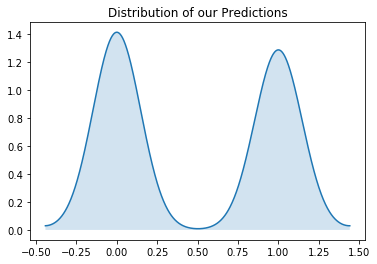

In [101]:
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")

In [102]:
clf = LinearRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

1.0

In [103]:
clf.predict(x_test)

array([[ 1.00000000e+00],
       [ 1.00000000e+00],
       [-1.66533454e-15],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [-3.55271368e-15],
       [ 1.00000000e+00],
       [ 2.22044605e-15],
       [ 1.00000000e+00],
       [ 1.77635684e-15],
       [ 1.66533454e-15],
       [-1.33226763e-15],
       [ 1.00000000e+00],
       [ 1.22124533e-15],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 2.55351296e-15],
       [ 6.66133815e-16],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [-3.55271368e-15],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [-3.33066907e-15],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.11022302e-16],
       [ 2.66453526e-15],
       [ 1.0

In [104]:
y_pred = clf.predict(x_test)

In [107]:
df5=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df5.head(15)

ValueError: If using all scalar values, you must pass an index

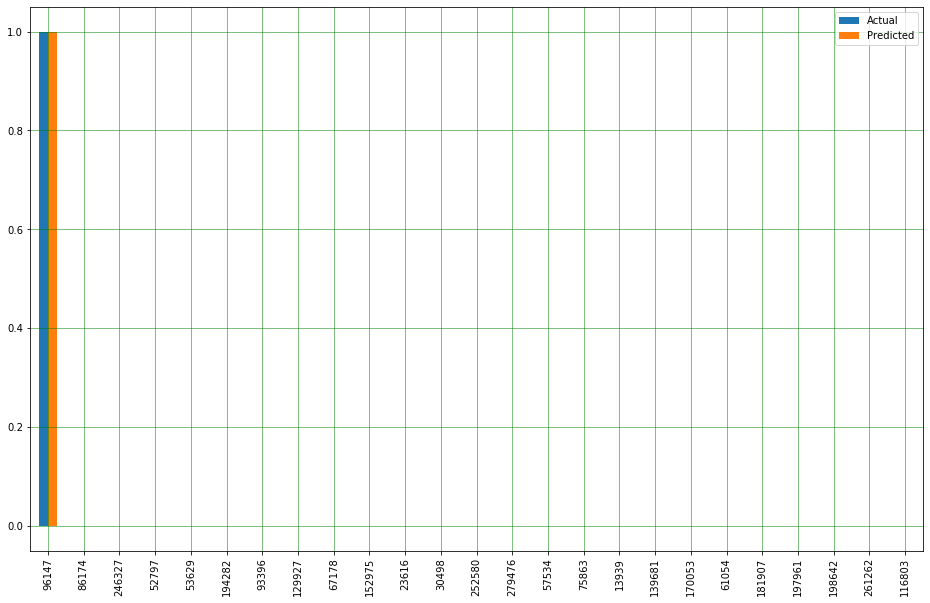

In [98]:
df6 = df5.head(25)
df6.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [99]:
df6.cov()

,Actual,Predicted
Actual,0.040000,0.039992
Predicted,0.039992,0.039984


In [100]:
from sklearn import metrics

In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.930271524782162e-05
Mean Squared Error: 1.461510664468302e-09
Root Mean Squared Error: 3.8229709186289944e-05


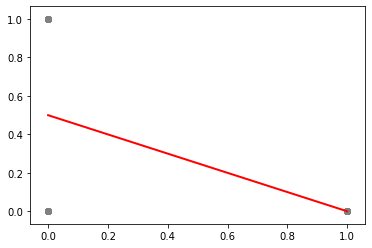

In [47]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

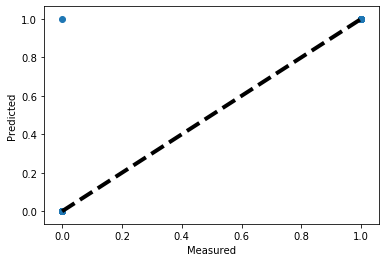

In [24]:
predicted = cross_val_predict(clf, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [102]:
from sklearn.model_selection import cross_val_predict

In [103]:
print(df['NmA'].shape)

(284484,)


In [104]:
print(y_test.shape)

(56897,)


In [105]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X,y,cv=cv)

array([0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994])

In [106]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=20)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.999858,{'normalize': True}
1,lasso,-0.000016,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.999858,"{'criterion': 'mse', 'splitter': 'best'}"


In [107]:
from sklearn.metrics import mean_squared_error, r2_score



In [108]:
print('Coefficients: \n', clf.coef_)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [ 8.50856446e-06  3.12536864e-07  2.53925153e+05  2.53925153e+05
 -9.99821189e-01 -9.99733310e-01 -8.44595808e-06 -8.31134570e-06
 -7.53599315e+06 -7.53599315e+06 -7.53599315e+06 -7.53599315e+06
 -7.53599315e+06 -7.53599315e+06 -7.53599315e+06 -7.53599315e+06
 -7.53599315e+06 -7.53599315e+06]
Mean squared error: 0.00
Coefficient of determination: 1.00


In [109]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'radom_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'Gaussian_nb' : {
        'model' : GaussianNB(),
        'params' : {}
    },
    'multinominal_nb' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy'],
        }
    },
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {}
    }
}

In [ ]:
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue')


plt.show()

In [ ]:
len(y_pred)

In [ ]:
len(X_test)

In [ ]:
len(y_test)

In [ ]:
print(df1.info())

In [ ]:
!python -V